<a href="https://colab.research.google.com/github/MAlHafiz/Pembelajaran-Mesin_Muhammad-Al-Hafiz_2211533010/blob/main/prakML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [5]:
from sklearn.datasets import make_moons
X, y = make_moons (n_samples=100, noise=0.15, random_state=42)

#define a function to plot the dataset
def plot_dataset(x, y, axes):
  plt.plot(x[:, 0] [y==0], x[:, 1] [y==0], "bs")
  plt.plot(x[:, 0] [y==1], x[:, 1] [y==0], "ms")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

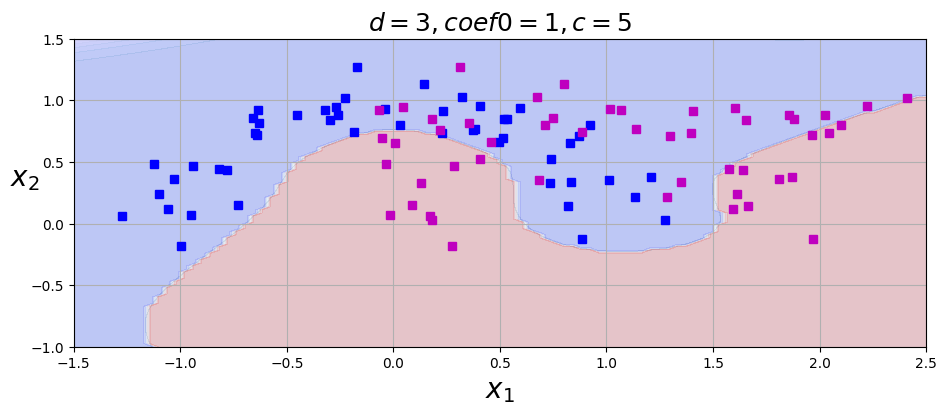

In [6]:
import matplotlib.pyplot as plt

# Define a function to plot the decision boundaries
def plot_predictions(clf, axes):
    # Create data in continuous linear space
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.PuBu, alpha=0.1)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
])

polynomial_svm_clf.fit(X,y)

plt.figure(figsize=(11, 4))

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5] )

plot_dataset(X, y,[-1.5, 2.5, -1, 1.5])

plt.title(r"$d=3, coef0=1, c=5$", fontsize=18)
plt.show()